In [1]:
import pandas as pd
import numpy as np

In [2]:
def y_change(y, cl):
    y_pr=[]
    for i in range(0, len(y)):
        if y[i] == cl:
            y_pr.append(1)
        else:
            y_pr.append(0)
    return y_pr

In [3]:
def hypothesis(X, theta):
    z = np.dot(X, theta)
    return 1/(1+np.exp(-(z)))

In [4]:
def cost_function(theta, X, y):
    m = X.shape[0]
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [5]:
def gradient(theta, X, y):
    m = X.shape[0]
    y1 = hypothesis(X, theta)
    return (1/m) * np.dot(X.T, y1 - y)

In [6]:
def fit(X, y, theta):
    opt_weigths = fmin_tnc(func=cost_function, x0=theta,
                          fprime=gradient, args=(X, y.flatten()))
    return opt_weigths[0]

In [7]:
def find_param(X, y, theta):
    y_uniq = list(set(y.flatten()))
    theta_list = []
    for i in y_uniq:
        y_tr = pd.Series(y_change(y, i))
        y_tr = y_tr[:, np.newaxis]
        theta1 = fit(X, y, theta)
        theta_list.append(theta1)
    return theta_list

In [8]:
def predict(theta_list, x, y):
    y_uniq = list(set(y.flatten()))
    y_hat = [0]*len(y)
    for i in range(0, len(y_uniq)):
        y_tr = y_change(y, y_uniq[i])
        y1 = hypothesis(X, theta_list[i])
        for k in range(0, len(y)):
            con1 = (y_tr[k] == 1)
            con2 = (y1[k] >= 0.5)
            if con1 and con2:
                y_hat[k] = y_uniq[i]
    return y_hat

In [9]:
df = np.loadtxt("transformed_data.csv", delimiter=",", dtype=float)
y = np.loadtxt("train.csv", delimiter=",", dtype=int)

FileNotFoundError: transformed_data_scikit.csv not found.

In [ ]:
X = np.c_[np.ones((df.shape[0], 1)), df]

In [ ]:
y = y[:,np.newaxis]

In [ ]:
from scipy.optimize import fmin_tnc
theta = np.zeros((X.shape[1], 1))

In [ ]:
theta_list = find_param(X[:1950], y[:1950], theta)

c:\users\nipun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\nipun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\nipun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\nipun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [ ]:
y_hat = predict(theta_list, X[1950:], y[1950:])

In [ ]:
accuracy=0
for i in range(0, len(y[1950:])):
    if y_hat[i] == y[1950:].flatten()[i]:
        accuracy += 1
print(accuracy/len(df[1950:])*100)

82.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(y_hat)

[1, 0, 1, 3, 0, 3, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 3, 0, 2, 1, 0, 1, 0, 2, 2, 0, 3, 1, 0, 1, 1, 0, 3, 0, 3, 0, 0, 2, 3, 0, 3]


In [ ]:
price_range = {0: 'low cost', 1: 'medium cost', 2: 'high cost', 3: 'very high cost'}

In [ ]:
cost_range = [price_range[p] for p in y_hat]

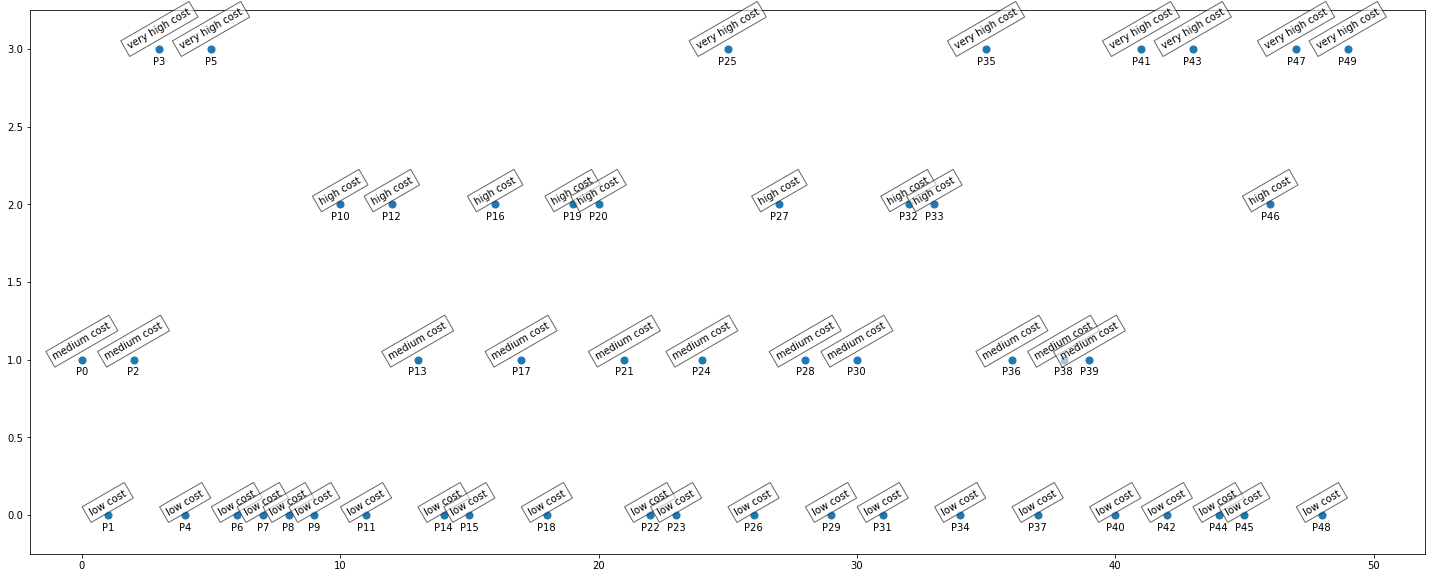

In [ ]:
plt.figure(figsize = (len(y_hat)/2,10))
plt.scatter(range(len(y_hat)),y_hat,s=50)
for i in range(len(y_hat)):
    plt.text(i,y_hat[i],cost_range[i],ha='center',Bbox = dict(facecolor = 'white', alpha =.6),rotation = 30)
    plt.text(i,y_hat[i]-.1,f"P{i}",ha='center')
plt.xlim([-2,len(y_hat)+2])
plt.ylim([-0.25,3.25])
plt.show()